In [ ]:
import gzip
import csv
import re
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import pearsonr

In [2]:
import seaborn as sns

In [3]:
advocate_dir = 'BeerAdvocate'
rev_with_scores = pd.read_csv(os.path.join(advocate_dir, 'reviews_with_exp_scores.csv'))

In [4]:
adv_beers = pd.read_csv(os.path.join(advocate_dir, 'beers.csv'))

In [5]:
users = pd.read_csv(os.path.join(advocate_dir, 'users.csv'))

In [5]:
rev_with_scores.columns

Index(['Unnamed: 0', 'user_id', 'beer_id', 'date', 'text', 'flavor', 'aroma',
       'mouthfeel', 'brewing', 'technical', 'appearance', 'judgment',
       'off_flavors', 'miscellaneous', 'expertness_score'],
      dtype='object')

In [6]:
rev_with_scores.head()

,Unnamed: 0,user_id,beer_id,date,text,flavor,aroma,mouthfeel,brewing,technical,appearance,judgment,off_flavors,miscellaneous,expertness_score
0,0,nmann08.184925,142544,1440064800,"From a bottle, pours a piss yellow color with ...",2,3,2,1,0,2,0,1,1,12
1,1,stjamesgate.163714,19590,1235127600,Pours pale copper with a thin head that quickl...,3,1,1,1,0,3,0,1,0,10
2,2,mdagnew.19527,19590,1142247600,"500ml Bottle bought from The Vintage, Antrim.....",9,2,4,2,2,4,0,1,0,24
3,3,helloloser12345.10867,19590,1101898800,Serving: 500ml brown bottlePour: Good head wit...,2,1,1,0,2,5,0,1,0,12
4,4,cypressbob.3708,19590,1093860000,"500ml bottlePours with a light, slightly hazy ...",2,1,1,1,3,5,0,0,1,14


In [6]:
col_to_keep = ['flavor', 'aroma', 'mouthfeel', 'brewing', 'technical', 'appearance', 'judgment','off_flavors', 'miscellaneous', 'expertness_score']
scores_for_beer = rev_with_scores.groupby('beer_id').agg(
    {col: ['mean', 'std'] for col in col_to_keep} | {'beer_id': 'count'}
)

scores_for_beer = scores_for_beer.rename(columns={'beer_id': 'review_count'})
scores_for_beer = scores_for_beer[scores_for_beer['review_count']['count']>1]


In [7]:
scores_for_beer

flavor               aroma           mouthfeel             brewing  \
             mean       std      mean       std      mean       std      mean   
beer_id                                                                         
3        2.333333  1.527525  1.666667  1.154701  1.000000  1.000000  0.666667   
4        4.400000  2.011080  1.500000  1.080123  3.500000  1.581139  1.200000   
5        2.051565  1.567989  1.163904  1.024076  2.075506  1.330805  0.839779   
6        3.236506  2.011754  0.868499  0.926778  2.208047  1.446456  0.842983   
7        2.059186  1.226839  0.998767  1.004311  1.901356  1.371720  0.413070   
...           ...       ...       ...       ...       ...       ...       ...   
292902   5.500000  0.707107  2.000000  1.414214  4.000000  1.414214  0.500000   
292909   4.500000  2.121320  1.500000  0.707107  2.500000  0.707107  1.000000   
292983   6.000000  8.485281  1.000000  1.414214  2.000000  1.414214  0.500000   
292990   1.000000  1.732051  0.000000  0.000000  0.333333  0.577350  1.000000   
293279   5.500000  0.707107  2.500000  2.121320  3.000000  1.414214  1.000000   

                  technical            ... appearance  judgment            \
              std      mean       std  ...        std      mean       std   
beer_id                                ...                                  
3        1.154701  1.333333  1.154701  ...   1.527525  0.333333  0.577350   
4        0.918937  2.100000  1.197219  ...   1.197219  0.300000  0.483046   
5        0.524423  1.802947  1.371773  ...   1.553101  0.174954  0.412846   
6        0.532700  1.733072  1.292032  ...   1.594661  0.218842  0.434511   
7        0.554022  1.631319  1.275972  ...   1.564415  0.166461  0.392094   
...           ...       ...       ...  ...        ...       ...       ...   
292902   0.707107  3.500000  0.707107  ...   1.414214  0.500000  0.707107   
292909   0.000000  3.000000  1.414214  ...   2.121320  0.500000  0.707107   
292983   0.707107  0.500000  0.707107  ...   0.707107  0.000000  0.000000   
292990   0.000000  0.666667  0.577350  ...   0.577350  0.333333  0.577350   
293279   0.000000  3.500000  0.707107  ...   1.414214  0.000000  0.000000   

        off_flavors           miscellaneous           expertness_score  \
               mean       std          mean       std             mean   
beer_id                                                                  
3          0.000000  0.000000      1.666667  1.154701        11.666667   
4          1.000000  0.666667      1.100000  0.994429        19.200000   
5          0.593002  0.606017      0.626151  0.772102        12.438306   
6          0.555447  0.605814      0.760550  0.839575        13.440628   
7          0.578298  0.561939      0.565968  0.748019        10.972873   
...             ...       ...           ...       ...              ...   
292902     0.500000  0.707107      1.500000  0.707107        21.000000   
292909     0.000000  0.000000      1.000000  1.414214        17.500000   
292983     0.500000  0.707107      0.000000  0.000000        12.000000   
292990     0.000000  0.000000      0.333333  0.577350         4.000000   
293279     0.500000  0.707107      2.000000  0.000000        21.000000   

                   review_count  
               std        count  
beer_id                          
3         5.507571            3  
4         6.908931           10  
5         5.504390          543  
6         5.809277         1019  
7         5.188235          811  
...            ...          ...  
292902    2.828427            2  
292909    4.949747            2  
292983   12.727922            2  
292990    3.464102            3  
293279    0.000000            2  

[93802 rows x 21 columns]

In [7]:
scores_for_beer.isnull().values.any()

False

In [18]:
col_to_keep = ['flavor', 'aroma', 'mouthfeel', 'brewing', 'technical', 'appearance', 'judgment','off_flavors', 'miscellaneous', 'expertness_score']
mean_scores_beer = rev_with_scores.groupby('beer_id').agg(
    {col: 'mean' for col in col_to_keep} | {'beer_id': 'count'}
)
mean_scores_beer =mean_scores_beer.rename(columns={'beer_id': 'review_count'})
complete_beer = pd.merge(adv_beers, mean_scores_beer, on='beer_id')

In [19]:
col_to_keep = ['flavor', 'aroma', 'mouthfeel', 'brewing', 'technical', 'appearance', 'judgment','off_flavors', 'miscellaneous', 'expertness_score', 'review_count']
beer_gr = complete_beer.groupby('style').agg(
    {col: 'mean' for col in col_to_keep}
)
beer_gr

,flavor,aroma,mouthfeel,brewing,technical,appearance,judgment,off_flavors,miscellaneous,expertness_score,review_count
style,,,,,,,,,,,
Altbier,3.014686,1.336180,2.018856,0.877932,2.073275,2.995335,0.240438,0.484027,0.835428,13.876157,11.628571
American Adjunct Lager,1.292532,0.953620,2.065614,0.712751,1.724698,2.711914,0.172381,0.799948,0.670423,11.103881,26.525931
American Amber / Red Ale,2.896874,1.186146,2.044840,0.848366,1.874614,3.002614,0.216233,0.496309,0.745792,13.311789,13.394568
American Amber / Red Lager,2.523703,1.301767,2.065704,0.847191,2.009565,3.034103,0.202358,0.602411,0.784000,13.370803,21.608295
American Barleywine,3.800391,0.969447,2.223506,0.666295,1.710785,2.707935,0.238621,0.533342,0.725458,13.575781,20.901377
...,...,...,...,...,...,...,...,...,...,...,...
Vienna Lager,2.586200,1.376629,2.112821,0.871498,2.101035,3.028335,0.222333,0.537709,0.825609,13.662170,15.115012
Weizenbock,3.779108,1.069548,2.230929,0.636788,1.786367,2.939320,0.277781,0.479106,0.760815,13.959762,21.898778
Wheatwine,3.618702,1.065272,2.209331,0.526002,1.734248,2.825997,0.253805,0.542225,0.699959,13.475540,17.634218


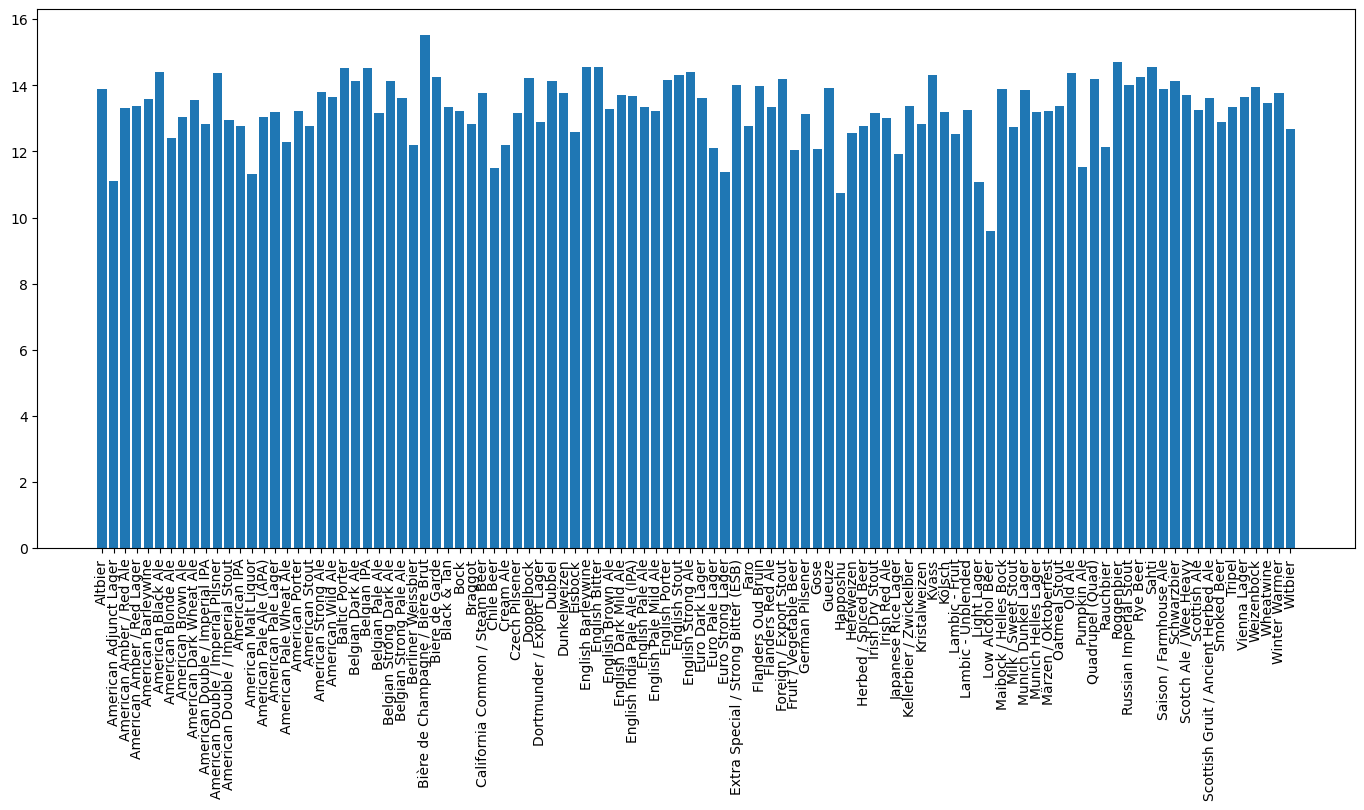

In [21]:
fig  = plt.figure(figsize=(17,7))
plt.bar(beer_gr.index, beer_gr['expertness_score'])

plt.xticks(rotation=90)
plt.show()

In [23]:
mean_scores_beer['review_count'].corr(mean_scores_beer['expertness_score'])

0.02501682404686422

In [24]:
col_to_keep = ['flavor', 'aroma', 'mouthfeel', 'brewing', 'technical', 'appearance', 'judgment','off_flavors', 'miscellaneous', 'expertness_score']
user_ba = rev_with_scores.groupby('user_id').agg(
    {col: 'mean' for col in col_to_keep} | {'user_id': 'count'}
)

user_ba = user_ba.rename(columns={'user_id': 'nbr_rev'})

<Axes: >

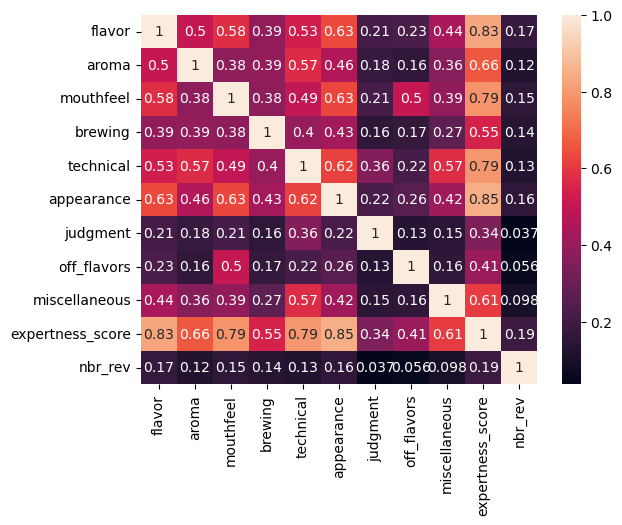

In [25]:
for_corr = col_to_keep + ['nbr_rev']
sns.heatmap(user_ba[for_corr].corr(), annot=True)

<Axes: >

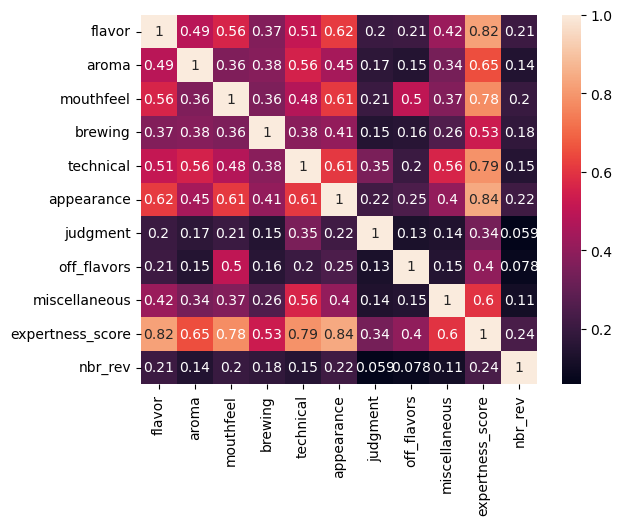

In [26]:
sns.heatmap(user_ba[user_ba['nbr_rev']<200][for_corr].corr(), annot=True)

In [32]:
pearsonr(user_ba['expertness_score'], user_ba['nbr_rev'])

PearsonRResult(statistic=0.18765341000201605, pvalue=0.0)

In [33]:
def first_reviews(df, max=200):
    """
    Returns the earliest reviews for each user, up to a specified maximum.

    Parameters
    ----------
    df : DataFrame containing user review data, with 'user_id' and 'date' columns.
    max : Maximum number of reviews to return per user (default is 200).

    Returns
    -------
    DataFrame containing up to `max` earliest reviews per user, sorted by 'user_id' and 'date'.
    """

    df = df.sort_values(by=['user_id', 'date'])
    return df.groupby('user_id').head(max)

In [34]:
def joined_date_zero(reviews):
    """
    Normalizes review dates to the first review date for each user, setting their first review as day zero.

    Parameters
    ----------
    reviews : DataFrame containing user review data, with columns 'user_id' and 'date' (assumed to be datetime).

    Returns
    -------
        DataFrame where each user's review dates are adjusted relative to their first review date, 
        so that the first review date for each user is zero.

    Example
    -------
    >>> joined_date_zero(reviews)
    """
    fir_rev = first_reviews(reviews, max=1).rename(columns={'date': 'first_date'})
    reviews = reviews.merge(fir_rev[['user_id', 'first_date']], on='user_id')
    reviews['date'] = reviews['date'] - reviews['first_date'] 
    reviews = reviews.drop(columns=['first_date'])
    return reviews

In [35]:
# Normalizes review dates to the first review date for each user, setting their first review as day zero.
rev_zero_date= joined_date_zero(rev_with_scores)

In [36]:
def standardize(x, y, cols):
    """
    Standardizes specified columns in DataFrame `x` based on means and standard deviations in DataFrame `y`.

    Parameters
    ----------
    x : DataFrame containing data to standardize, with 'beer_id' and columns to be standardized.
    y : DataFrame with 'beer_id' and statistical information for standardization, including means and standard deviations.
    cols : List of column names to standardize in `x`.

    Returns
    -------
        DataFrame `x` with specified columns standardized.
    """
    y_copy = y.drop(columns=['review_count'])
    y_copy.columns = ['beer_id'] + [f"{col}_{stat}" for col in cols for stat in ['mean', 'std']]

    x = x.merge(y_copy, on='beer_id')

    for col in cols:
        std = x[f"{col}_std"]
        x[col] = np.where(std != 0, (x[col] - x[f"{col}_mean"]) / std, x[col] - x[f"{col}_mean"])

    x = x.drop(columns=[f"{col}_mean" for col in cols])

    return x


In [83]:
col_to_keep = ['flavor', 'aroma', 'mouthfeel', 'brewing', 'technical', 'appearance', 'judgment','off_flavors', 'miscellaneous', 'expertness_score']

# Standardize the reviews score through the mean and the std of the scores for that particular beer 
rev_std = standardize(rev_zero_date, scores_for_beer.reset_index(), col_to_keep)

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_11332\233122733.py:15: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])


In [51]:
def corr_and_count(group, att_1='expertness_score', replace_date=False):
    """
    Calculates the correlation between att_1 and 'date' within a given group, 
    along with the count of 'date' entries.

    Parameters
    ----------
    group :  A DataFrame group with columns att_1 and 'date'.
    att_1 : name of the first column
    replace_date : bool if True replace the date with an incremental counter

    Returns
    -------
    A Series containing:
        - 'correlation': The correlation between att_1 and 'date'. If the standard deviation 
          of either column is zero, the correlation is set to NaN.
        - 'total_count': The count of non-NaN entries in the 'date' column.

    """
    if(replace_date):
        group = group.sort_values(by='date')
        group['date'] = range(len(group))
        
    count = group['date'].count()
    if group[att_1].std() == 0 or group['date'].std() == 0 or len(group['date'])<2:
        correlation= float('nan') 
        p_value = float('nan')
    else:
        correlation, p_value = pearsonr(group[att_1], group['date'])
    
    return pd.Series({'correlation': correlation,'p_value': p_value,  'total_count': count})



In [52]:
#result = rev_with_scores.groupby('user_id').apply(corr_and_count, include_groups=False)

In [84]:
# 
result = rev_std.groupby('user_id').apply(corr_and_count, include_groups=False)

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_11332\2898286762.py:29: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  correlation, p_value = pearsonr(group[att_1], group['date'])


In [85]:
result = result.dropna()
result

,correlation,p_value,total_count
user_id,,,
--dom--.709199,-0.463132,0.000479,53.0
-mk-.763762,-0.470492,0.239369,8.0
-rick.912339,0.257672,0.000286,194.0
-steve-.781156,0.397605,0.014812,37.0
007.8521,-0.538299,0.349330,5.0
...,...,...,...
zymurgo.447590,0.371252,0.538402,5.0
zymurgy4all.11427,0.051367,0.621051,95.0
zythophile.1101219,0.150098,0.043715,181.0


In [86]:
result[(result['total_count'] > 20) & (result['total_count'] < 500)]['correlation'].mean()

0.05105533777599298

In [87]:
result['correlation'].mean()

0.030316787341276137

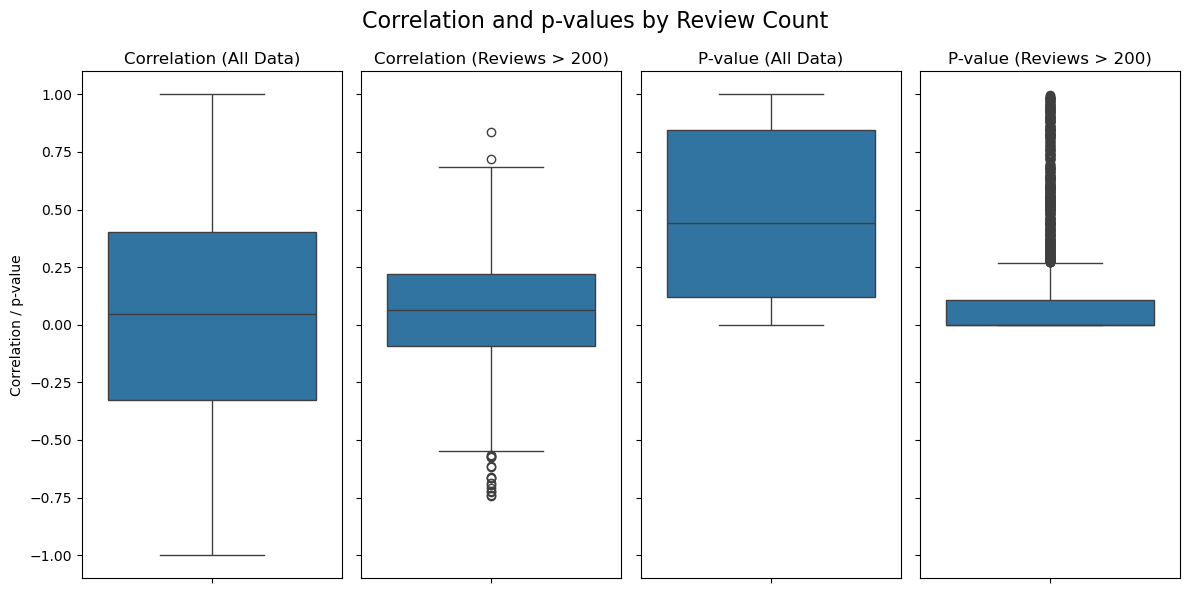

In [93]:
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey = True) 


fig.suptitle("Correlation and p-values by Review Count", fontsize=16)
sns.boxplot(y=result['correlation'], ax=axes[0])
axes[0].set_title("Correlation (All Data)")
axes[0].set_ylabel("Correlation / p-value")

sns.boxplot(y=result[result['total_count'] > 200]['correlation'], ax=axes[1])
axes[1].set_title("Correlation (Reviews > 200)")

sns.boxplot(y=result['p_value'], ax=axes[2])
axes[2].set_title("P-value (All Data)")

sns.boxplot(y=result[result['total_count'] > 200]['p_value'], ax=axes[3])
axes[3].set_title("P-value (Reviews > 200)")

plt.tight_layout()  
plt.show()


In [99]:
len(users[users['nbr_reviews']>200])

2621

In [100]:
def review_of_experts(df, users, nbr_rev=100):
    x = df.merge(users[['user_id','nbr_reviews']], on='user_id')
    return x[x['nbr_reviews']>nbr_rev]

In [101]:
rev_of_exp = review_of_experts(rev_with_scores, users, nbr_rev=200)
rev_of_exp = first_reviews(rev_of_exp, max=100)
rev_exp_zero_date= joined_date_zero(rev_of_exp)

col_to_keep = ['flavor', 'aroma', 'mouthfeel', 'brewing', 'technical', 'appearance', 'judgment','off_flavors', 'miscellaneous', 'expertness_score']

rev_exp_std = standardize(rev_exp_zero_date, scores_for_beer.reset_index(), col_to_keep)
result = rev_exp_std.groupby('user_id').apply(corr_and_count, include_groups=False)

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_11332\233122733.py:15: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])


In [102]:
result = result.dropna()

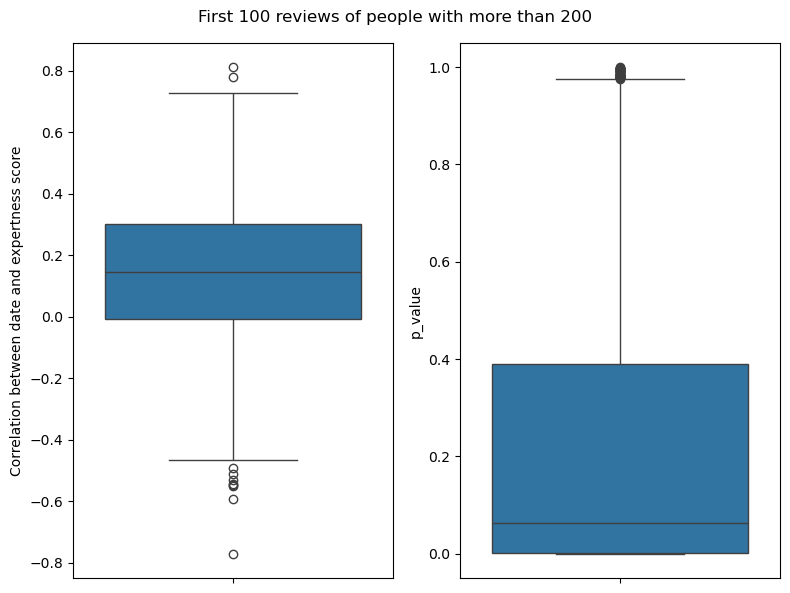

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6)) 

fig.suptitle('First 100 reviews of people with more than 200')

sns.boxplot(y=result['correlation'], ax=axes[0])

axes[0].set_ylabel("Correlation between date and expertness score")

sns.boxplot(y=result['p_value'], ax=axes[1])
axes[1].set_ylabel("p_value")

plt.tight_layout()  
plt.show()


In [79]:
result['correlation'].mean()

0.14522741143012757

In [104]:
rev_of_exp = review_of_experts(rev_with_scores, users, nbr_rev=200)
rev_of_exp = first_reviews(rev_of_exp, max=5)

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_11332\233122733.py:15: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])


Text(0.5, 1.0, 'Mean of the score (standardized) of the first 5 reviews of people with more than 200')

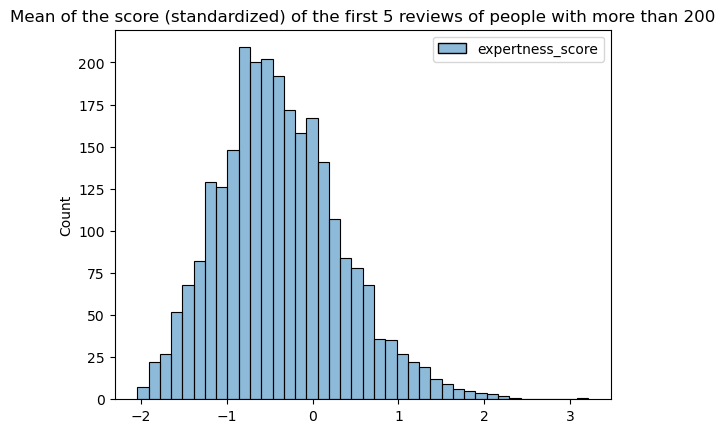

In [105]:
rev_exp_std = standardize(rev_of_exp, scores_for_beer.reset_index(), col_to_keep)
rev_exp_std_grouped = rev_exp_std.groupby('user_id')[['expertness_score']].agg('mean')
sns.histplot(rev_exp_std_grouped)
plt.title('Mean of the score (standardized) of the first 5 reviews of people with more than 200')

In [106]:
no_already_experts = rev_exp_std_grouped[rev_exp_std_grouped['expertness_score']<-0.5].index

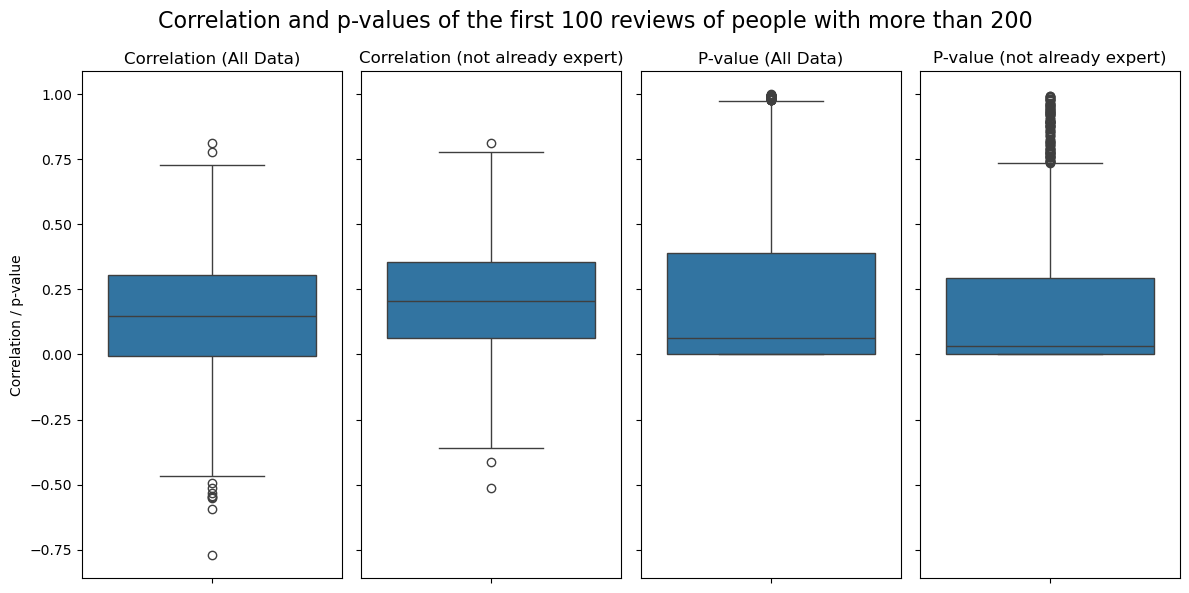

In [111]:
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey = True) 

fig.suptitle("Correlation and p-values of the first 100 reviews of people with more than 200", fontsize=16)
sns.boxplot(y=result['correlation'], ax=axes[0])
axes[0].set_title("Correlation (All Data)")
axes[0].set_ylabel("Correlation / p-value")

sns.boxplot(y=result[result.index.isin(no_already_experts)]['correlation'], ax=axes[1])
axes[1].set_title("Correlation (not already expert)")

sns.boxplot(y=result['p_value'], ax=axes[2])
axes[2].set_title("P-value (All Data)")

sns.boxplot(y=result[result.index.isin(no_already_experts)]['p_value'], ax=axes[3])
axes[3].set_title("P-value (not already expert)")

plt.tight_layout()
plt.show()

In [112]:
result[result.index.isin(no_already_experts)].correlation.mean()

0.20861381218103942

In [113]:
result[result.index.isin(no_already_experts)].p_value.describe()

count    1.224000e+03
mean     1.924268e-01
std      2.795992e-01
min      1.227728e-24
25%      2.799850e-04
50%      3.349889e-02
75%      2.941423e-01
max      9.940635e-01
Name: p_value, dtype: float64

__Using and incremental count instead of the date__

In [134]:
col_to_keep = ['flavor', 'aroma', 'mouthfeel', 'brewing', 'technical', 'appearance', 'judgment','off_flavors', 'miscellaneous', 'expertness_score']

rev_exp_std = standardize(rev_with_scores, scores_for_beer.reset_index(), col_to_keep)


C:\Users\Alessandro\AppData\Local\Temp\ipykernel_11332\233122733.py:15: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])


In [135]:
result_rep_date = rev_exp_std.groupby('user_id').apply(lambda group: corr_and_count(group, replace_date=True), include_groups=False)
result_rep_date = result_rep_date.dropna()

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_11332\2898286762.py:29: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  correlation, p_value = pearsonr(group[att_1], group['date'])


In [136]:
len(result_rep_date)

38696

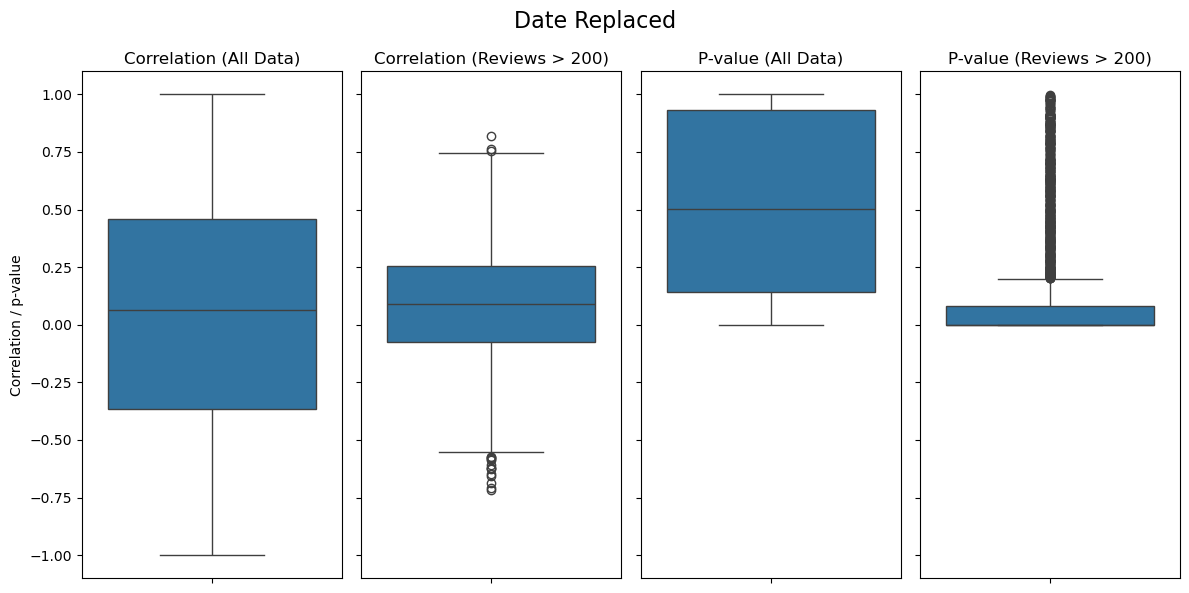

In [137]:
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey = True) 

fig.suptitle('Date Replaced', fontsize=16)
sns.boxplot(y=result_rep_date['correlation'], ax=axes[0])
axes[0].set_title("Correlation (All Data)")
axes[0].set_ylabel("Correlation / p-value")

sns.boxplot(y=result_rep_date[result_rep_date['total_count'] > 200]['correlation'], ax=axes[1])
axes[1].set_title("Correlation (Reviews > 200)")

sns.boxplot(y=result_rep_date['p_value'], ax=axes[2])
axes[2].set_title("P-value (All Data)")

sns.boxplot(y=result_rep_date[result_rep_date['total_count'] > 200]['p_value'], ax=axes[3])
axes[3].set_title("P-value (Reviews > 200)")


plt.tight_layout()  
plt.show()

In [125]:
result_rep_date[(result_rep_date['total_count'] > 20) & (result_rep_date['total_count'] < 500)]['correlation'].mean()

0.07853004645798888

In [126]:
result_rep_date['correlation'].mean()

0.03592445406368377

In [127]:
rev_of_exp = review_of_experts(rev_with_scores, users, nbr_rev=200)
rev_of_exp = first_reviews(rev_of_exp, max=100)

col_to_keep = ['flavor', 'aroma', 'mouthfeel', 'brewing', 'technical', 'appearance', 'judgment','off_flavors', 'miscellaneous', 'expertness_score']

rev_exp_std = standardize(rev_of_exp, scores_for_beer.reset_index(), col_to_keep)
result_rep_date = rev_exp_std.groupby('user_id').apply(lambda group: corr_and_count(group, replace_date=True), include_groups=False)
result_rep_date = result_rep_date.dropna()

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_11332\233122733.py:15: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])


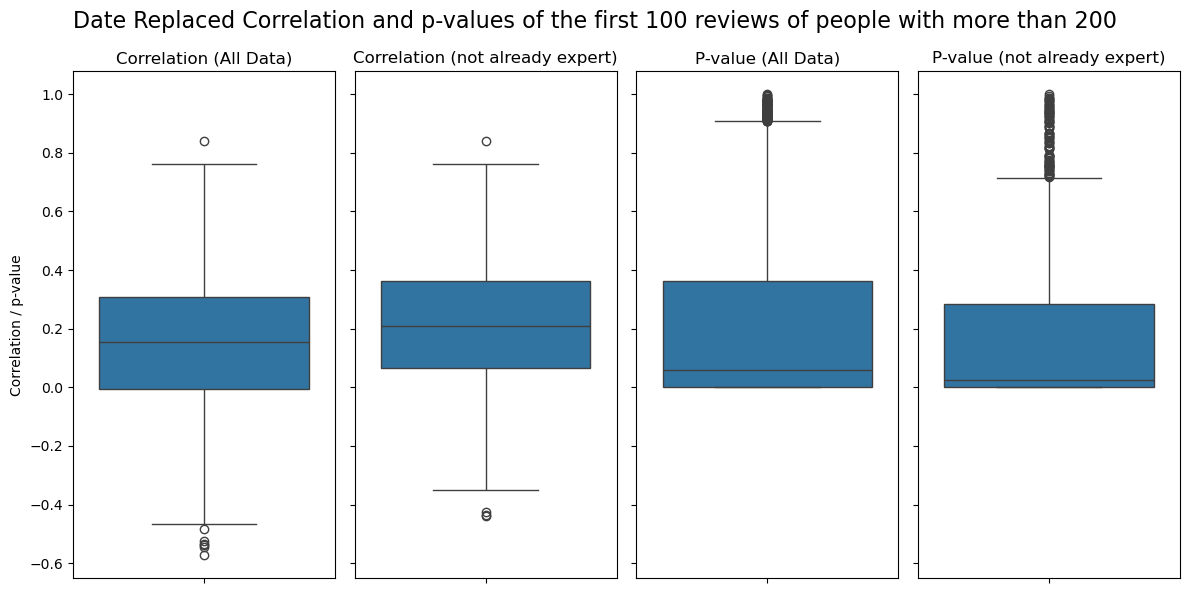

In [133]:
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey=True) 


fig.suptitle("Date Replaced Correlation and p-values of the first 100 reviews of people with more than 200", fontsize=16)
sns.boxplot(y=result_rep_date['correlation'], ax=axes[0])
axes[0].set_title("Correlation (All Data)")
axes[0].set_ylabel("Correlation / p-value")

sns.boxplot(y=result_rep_date[result_rep_date.index.isin(no_already_experts)]['correlation'], ax=axes[1])
axes[1].set_title("Correlation (not already expert)")

sns.boxplot(y=result_rep_date['p_value'], ax=axes[2])
axes[2].set_title("P-value (All Data)")

sns.boxplot(y=result_rep_date[result_rep_date.index.isin(no_already_experts)]['p_value'], ax=axes[3])
axes[3].set_title("P-value (not already expert)")

plt.tight_layout()
plt.show()

In [129]:
result_rep_date[result_rep_date.index.isin(no_already_experts)].correlation.mean()

0.21200048975312868

In [130]:
result_rep_date.correlation.mean()

0.15000998796298484

In [131]:
result_rep_date[result_rep_date.index.isin(no_already_experts)].p_value.describe()

count    1.226000e+03
mean     1.821448e-01
std      2.703455e-01
min      6.476565e-28
25%      2.189595e-04
50%      2.547517e-02
75%      2.859022e-01
max      9.995241e-01
Name: p_value, dtype: float64